In [2]:
import pandas as pd
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
df = pd.DataFrame(digits.data,digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.5, random_state=9)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
len(X_train)

898

In [14]:
len(X_test)

899

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
knn.score(X_test,y_test)

0.9755283648498332

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[88,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 87,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 85,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0, 91,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 84,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  0, 90,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0, 84,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 93,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 84,  0],
       [ 0,  1,  0,  3,  0,  1,  0,  0,  1, 91]], dtype=int64)

Text(51.0, 0.5, 'True output')

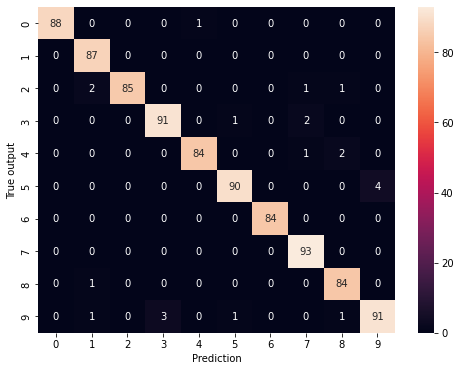

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('True output')

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.96      1.00      0.98        87
           2       1.00      0.96      0.98        89
           3       0.97      0.97      0.97        94
           4       0.99      0.97      0.98        87
           5       0.98      0.96      0.97        94
           6       1.00      1.00      1.00        84
           7       0.96      1.00      0.98        93
           8       0.95      0.99      0.97        85
           9       0.96      0.94      0.95        97

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

